In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd

In [2]:
imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised= True)

In [3]:
train_data, test_data = imdb['train'], imdb['test']

In [4]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [5]:
training_sentences[0]

'b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."'

In [6]:
training_labels[0]

0

In [7]:
training_sentences[4]

'b\'As others have mentioned, all the women that go nude in this film are mostly absolutely gorgeous. The plot very ably shows the hypocrisy of the female libido. When men are around they want to be pursued, but when no "men" are around, they become the pursuers of a 14 year old boy. And the boy becomes a man really fast (we should all be so lucky at this age!). He then gets up the courage to pursue his true love.\''

In [8]:
len(training_sentences), len(training_labels)

(25000, 25000)

In [9]:
from collections import Counter
Counter(training_labels)

Counter({0: 12500, 1: 12500})

In [10]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [11]:
vocab = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'

In [12]:
pip install keras_preprocessing

In [13]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=vocab)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 "'s": 20,
 'on': 21,
 'you': 22,
 'not': 23,
 'are': 24,
 'his': 25,
 'he': 26,
 'have': 27,
 'be': 28,
 'one': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'they': 33,
 'an': 34,
 'who': 35,
 'so': 36,
 'from': 37,
 'like': 38,
 'her': 39,
 "'t": 40,
 'or': 41,
 'just': 42,
 'there': 43,
 'about': 44,
 'out': 45,
 "'": 46,
 'has': 47,
 'if': 48,
 'some': 49,
 'what': 50,
 'good': 51,
 'more': 52,
 'very': 53,
 'when': 54,
 'she': 55,
 'up': 56,
 'can': 57,
 'b': 58,
 'time': 59,
 'no': 60,
 'even': 61,
 'my': 62,
 'would': 63,
 'which': 64,
 'story': 65,
 'only': 66,
 'really': 67,
 'see': 68,
 'their': 69,
 'had': 70,
 'were': 71,
 'me': 72,
 'well': 73,
 'we': 74,
 'than': 75,
 'much': 76,
 'been': 77,
 'get': 78,
 'bad': 79,
 'will': 80,
 'people': 81,
 'do': 82,
 'also': 83,


In [14]:
len(word_index)

86538

In [15]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length,
                       truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [16]:
padded.shape

(25000, 120)

In [17]:
testing_padded.shape

(25000, 120)

In [18]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 "'s": 20,
 'on': 21,
 'you': 22,
 'not': 23,
 'are': 24,
 'his': 25,
 'he': 26,
 'have': 27,
 'be': 28,
 'one': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'they': 33,
 'an': 34,
 'who': 35,
 'so': 36,
 'from': 37,
 'like': 38,
 'her': 39,
 "'t": 40,
 'or': 41,
 'just': 42,
 'there': 43,
 'about': 44,
 'out': 45,
 "'": 46,
 'has': 47,
 'if': 48,
 'some': 49,
 'what': 50,
 'good': 51,
 'more': 52,
 'very': 53,
 'when': 54,
 'she': 55,
 'up': 56,
 'can': 57,
 'b': 58,
 'time': 59,
 'no': 60,
 'even': 61,
 'my': 62,
 'would': 63,
 'which': 64,
 'story': 65,
 'only': 66,
 'really': 67,
 'see': 68,
 'their': 69,
 'had': 70,
 'were': 71,
 'me': 72,
 'well': 73,
 'we': 74,
 'than': 75,
 'much': 76,
 'been': 77,
 'get': 78,
 'bad': 79,
 'will': 80,
 'people': 81,
 'do': 82,
 'also': 83,


In [19]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding

In [20]:
import matplotlib.pyplot as plt

In [21]:
###-----------------------------------
### Function to plot Loss Curve
###-----------------------------------
CMAP = 'coolwarm'
def fn_plot_tf_hist(hist_df):
    '''
    Args:
      hist_df : pandas Dataframe with four columns
                For 'x' values, we will use index
    '''
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12

    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y3] == hist_df[y3].min()]

    ax = axes[0]

    hist_df.plot(y = [y1,y3], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = "{}: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(y1.capitalize(),
                           hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy()-1, best[y3].to_numpy()[0]), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.set_title('Errors')
    ax.grid();
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y2, y4], ax = ax, colormap=CMAP)

    # little beautification
    txtFmt = "{}: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(y2.capitalize(),
                           hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy()-1, best[y4].to_numpy()[0]), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y2.capitalize())
    ax.grid()
    ax.legend(loc = 'lower left')

    plt.tight_layout()

In [22]:
model_rnn = Sequential([
    Embedding(vocab, embedding_dim, input_length=max_length),
    SimpleRNN(32),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161909 (632.46 KB)
Trainable params: 161909 (632.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model_rnn.compile(loss='binary_crossentropy' ,optimizer='adam',metrics=['accuracy'])

In [24]:
history_rnn = model_rnn.fit(padded, training_labels_final, epochs=5,
                        validation_data=(testing_padded, testing_labels_final))

Epoch 1/5
782/782 [==============================] - 142s 176ms/step - loss: 0.6934 - accuracy: 0.5117 - val_loss: 0.6918 - val_accuracy: 0.5187
Epoch 2/5
782/782 [==============================] - 98s 125ms/step - loss: 0.6570 - accuracy: 0.6026 - val_loss: 0.5798 - val_accuracy: 0.6982
Epoch 3/5
782/782 [==============================] - 99s 127ms/step - loss: 0.4779 - accuracy: 0.7777 - val_loss: 0.5061 - val_accuracy: 0.7744
Epoch 4/5
782/782 [==============================] - 98s 125ms/step - loss: 0.3170 - accuracy: 0.8668 - val_loss: 0.6020 - val_accuracy: 0.7585
Epoch 5/5
782/782 [==============================] - 99s 126ms/step - loss: 0.1731 - accuracy: 0.9369 - val_loss: 0.9779 - val_accuracy: 0.6300


In [25]:
history_rnn = pd.DataFrame(history_rnn.history)

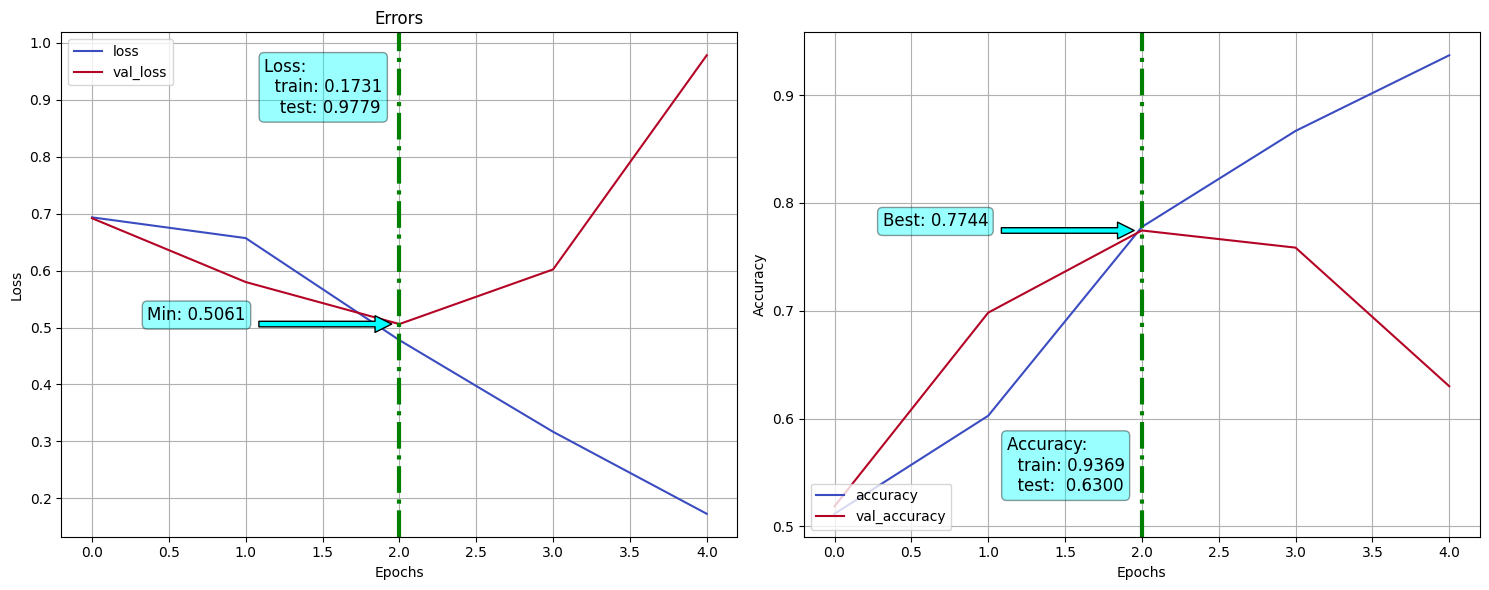

In [26]:
fn_plot_tf_hist(history_rnn)

In [27]:
from tensorflow.keras.layers import Bidirectional, GRU, LSTM

In [28]:
model_gru = Sequential([
    Embedding(vocab, embedding_dim, input_length=max_length),
    Bidirectional(GRU(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                9600      
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 170261 (665.08 KB)
Trainable params: 170261 (665.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model_gru.compile(loss='binary_crossentropy' ,optimizer='adam',metrics=['accuracy'])

In [30]:
history_gru = model_gru.fit(padded, training_labels_final, epochs=5,
                        validation_data=(testing_padded, testing_labels_final))

Epoch 1/5
782/782 [==============================] - 39s 43ms/step - loss: 0.4979 - accuracy: 0.7383 - val_loss: 0.3596 - val_accuracy: 0.8466
Epoch 2/5
782/782 [==============================] - 16s 21ms/step - loss: 0.2942 - accuracy: 0.8834 - val_loss: 0.3468 - val_accuracy: 0.8507
Epoch 3/5
782/782 [==============================] - 16s 20ms/step - loss: 0.2290 - accuracy: 0.9143 - val_loss: 0.3667 - val_accuracy: 0.8438
Epoch 4/5
782/782 [==============================] - 15s 19ms/step - loss: 0.1775 - accuracy: 0.9350 - val_loss: 0.3961 - val_accuracy: 0.8320
Epoch 5/5
782/782 [==============================] - 15s 19ms/step - loss: 0.1300 - accuracy: 0.9548 - val_loss: 0.4978 - val_accuracy: 0.8305


In [31]:
history_gru = pd.DataFrame(history_gru.history)

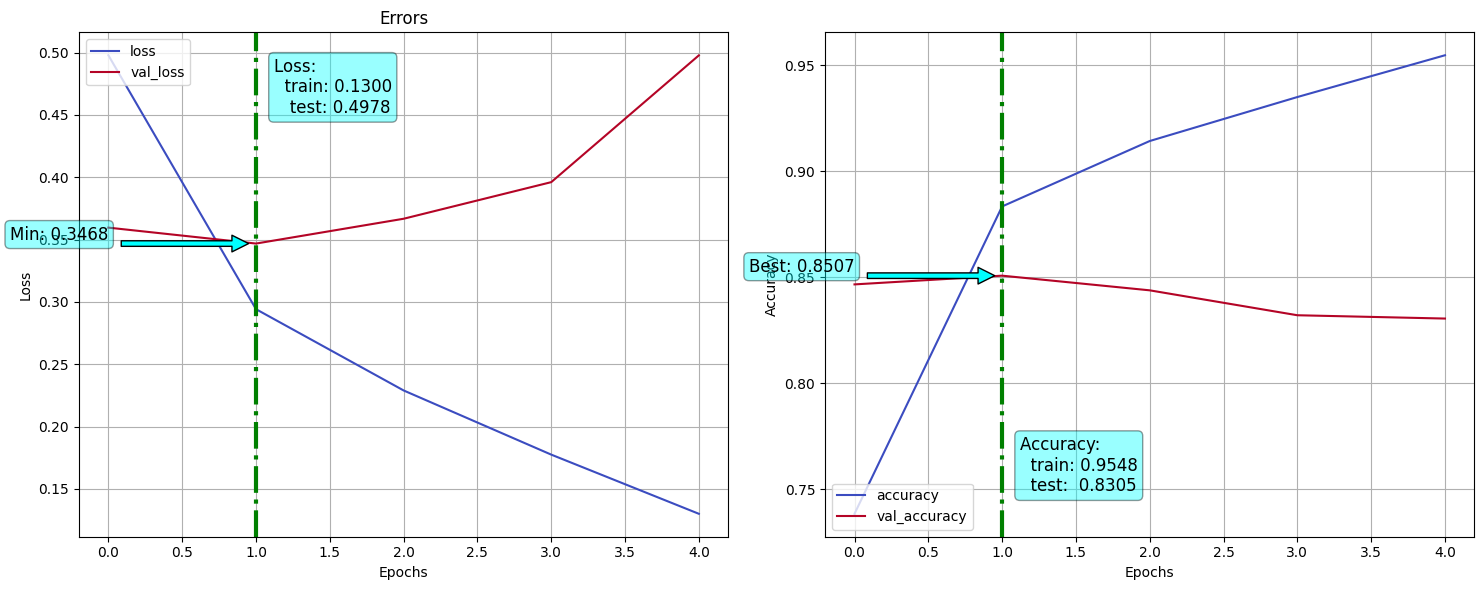

In [32]:
fn_plot_tf_hist(history_gru)

In [33]:
model_lstm = Sequential([
    Embedding(vocab, embedding_dim, input_length=max_length),
    LSTM(32),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                9600      
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 170261 (665.08 KB)
Trainable params: 170261 (665.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model_lstm.compile(loss='binary_crossentropy' ,optimizer='adam',metrics=['accuracy'])

In [35]:
history_lstm = model_gru.fit(padded, training_labels_final, epochs=5,
                        validation_data=(testing_padded, testing_labels_final))

Epoch 1/5
782/782 [==============================] - 17s 22ms/step - loss: 0.0875 - accuracy: 0.9707 - val_loss: 0.5529 - val_accuracy: 0.8243
Epoch 2/5
782/782 [==============================] - 15s 19ms/step - loss: 0.0632 - accuracy: 0.9790 - val_loss: 0.6965 - val_accuracy: 0.8053
Epoch 3/5
782/782 [==============================] - 16s 20ms/step - loss: 0.0429 - accuracy: 0.9867 - val_loss: 0.7951 - val_accuracy: 0.8225
Epoch 4/5
782/782 [==============================] - 14s 18ms/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.8731 - val_accuracy: 0.8124
Epoch 5/5
782/782 [==============================] - 14s 18ms/step - loss: 0.0214 - accuracy: 0.9928 - val_loss: 1.0351 - val_accuracy: 0.8142


In [36]:
history_lstm = pd.DataFrame(history_lstm.history)

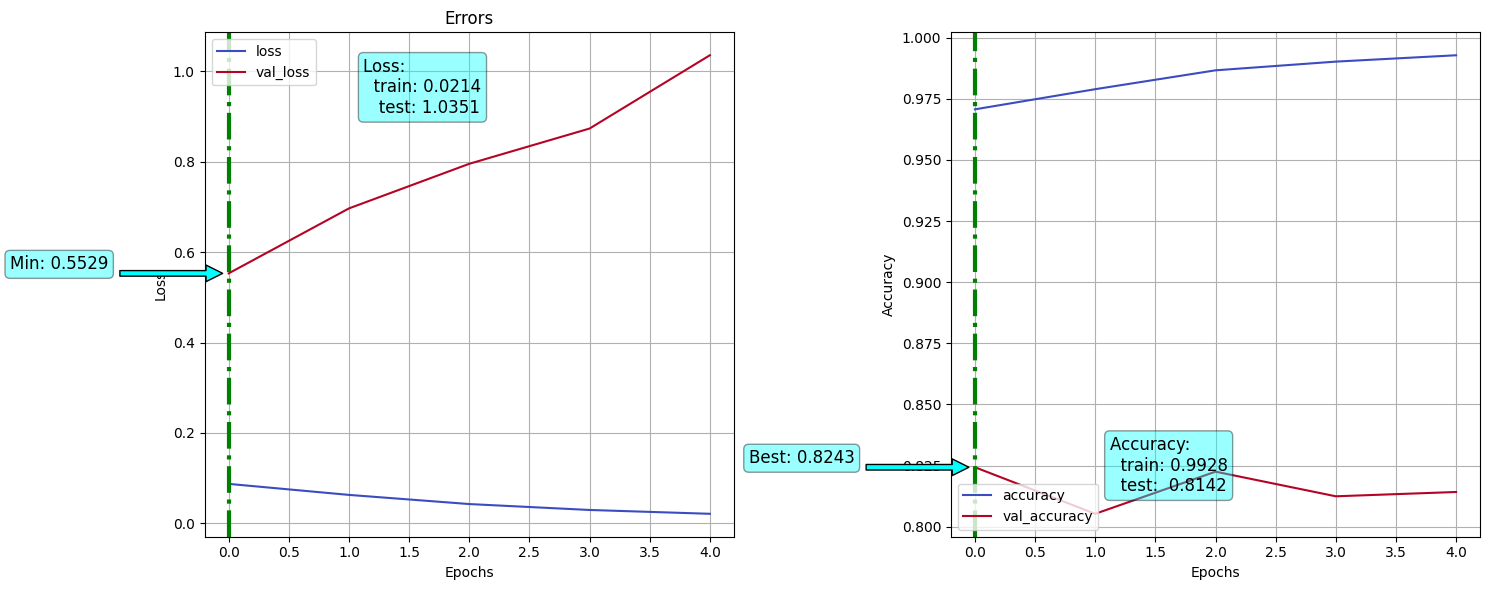

In [37]:
fn_plot_tf_hist(history_lstm)

In [38]:
new1 = 'The was worst movie. Please do not watch it. Waste of money and time'
new2 = 'A must watch movie. I loved to watch it. It was just amazing!'

In [39]:
def predict_sentiment_lstm(new_text):
  new_sequences = tokenizer.texts_to_sequences([new_text])
  new_padded = pad_sequences(new_sequences, maxlen=max_length, truncating= trunc_type)
  prediction = model_lstm.predict(new_padded, verbose=False)
  percent_pos = prediction[0,0]
  if round(percent_pos) == 0:
    return float((1-percent_pos)*100), 'Positive'
  else:
    return float(percent_pos*100), 'Negative'


In [40]:
predict_sentiment_lstm(new2)

(50.00157356262207, 'Positive')

In [41]:
percent, sentiment = predict_sentiment_lstm(new1)
print(f'Review: [{new1}]\n Sentiment: {sentiment} ({percent:.3f}%)')

Review: [The was worst movie. Please do not watch it. Waste of Money and time]
 Sentiment: Negative (50.035%)


In [42]:
percent, sentiment = predict_sentiment_lstm(new2)
print(f'Review: [{new2}]\n Sentiment: {sentiment} ({percent:.3f}%)')

Review: [A must watch movie. I loved to watch it. It was just amazing!]
 Sentiment: Positive (50.002%)
